<a href="https://colab.research.google.com/github/parshadk/DataMiningAndBusinessIntelligence/blob/main/Naive_bayes_ID3_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./fraud_dataset.csv')
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [19]:
df = df.dropna()


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['nameOrig'] = le.fit_transform(df['nameOrig'])
df['nameDest'] = le.fit_transform(df['nameDest'])

X = df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))



Accuracy: 0.9688
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     35780
         1.0       0.00      0.17      0.01        23

    accuracy                           0.97     35803
   macro avg       0.50      0.57      0.50     35803
weighted avg       1.00      0.97      0.98     35803



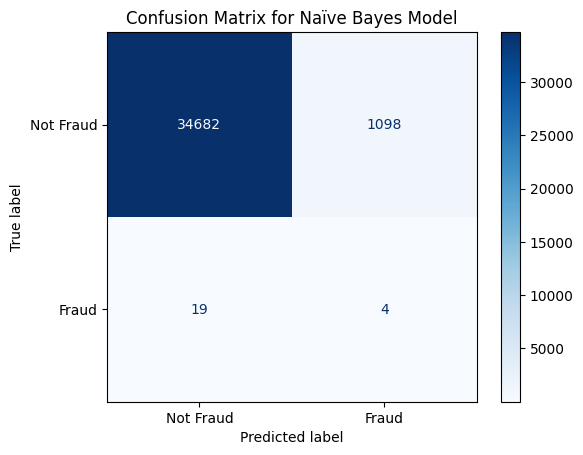

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Naïve Bayes Model")
plt.show()


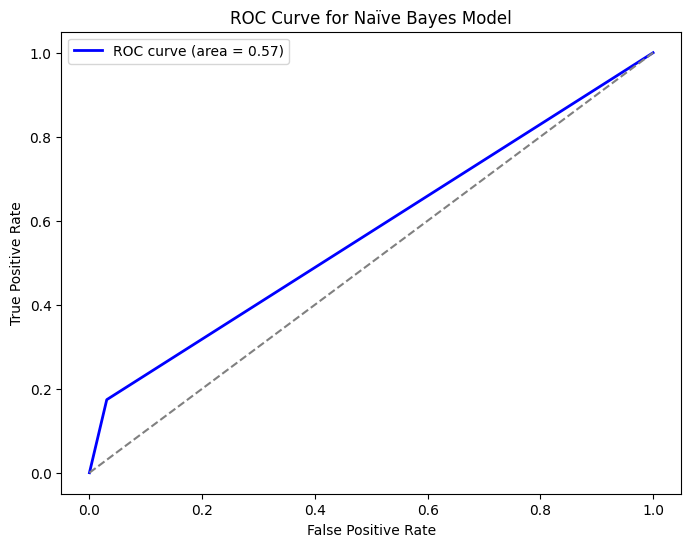

In [34]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naïve Bayes Model")
plt.legend()
plt.show()


ID3

In [47]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['type'] = label_encoder.fit_transform(df['type'])
df['nameOrig'] = label_encoder.fit_transform(df['nameOrig'])
df['nameDest'] = label_encoder.fit_transform(df['nameDest'])

X = df.drop(columns=['isFraud', 'isFlaggedFraud'])
y = df['isFraud']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(143210, 10) (143210,)


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
id3_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

id3_tree.fit(X_train, y_train)
y_pred = id3_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35780
         1.0       0.00      0.00      0.00        23

    accuracy                           1.00     35803
   macro avg       0.50      0.50      0.50     35803
weighted avg       1.00      1.00      1.00     35803



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


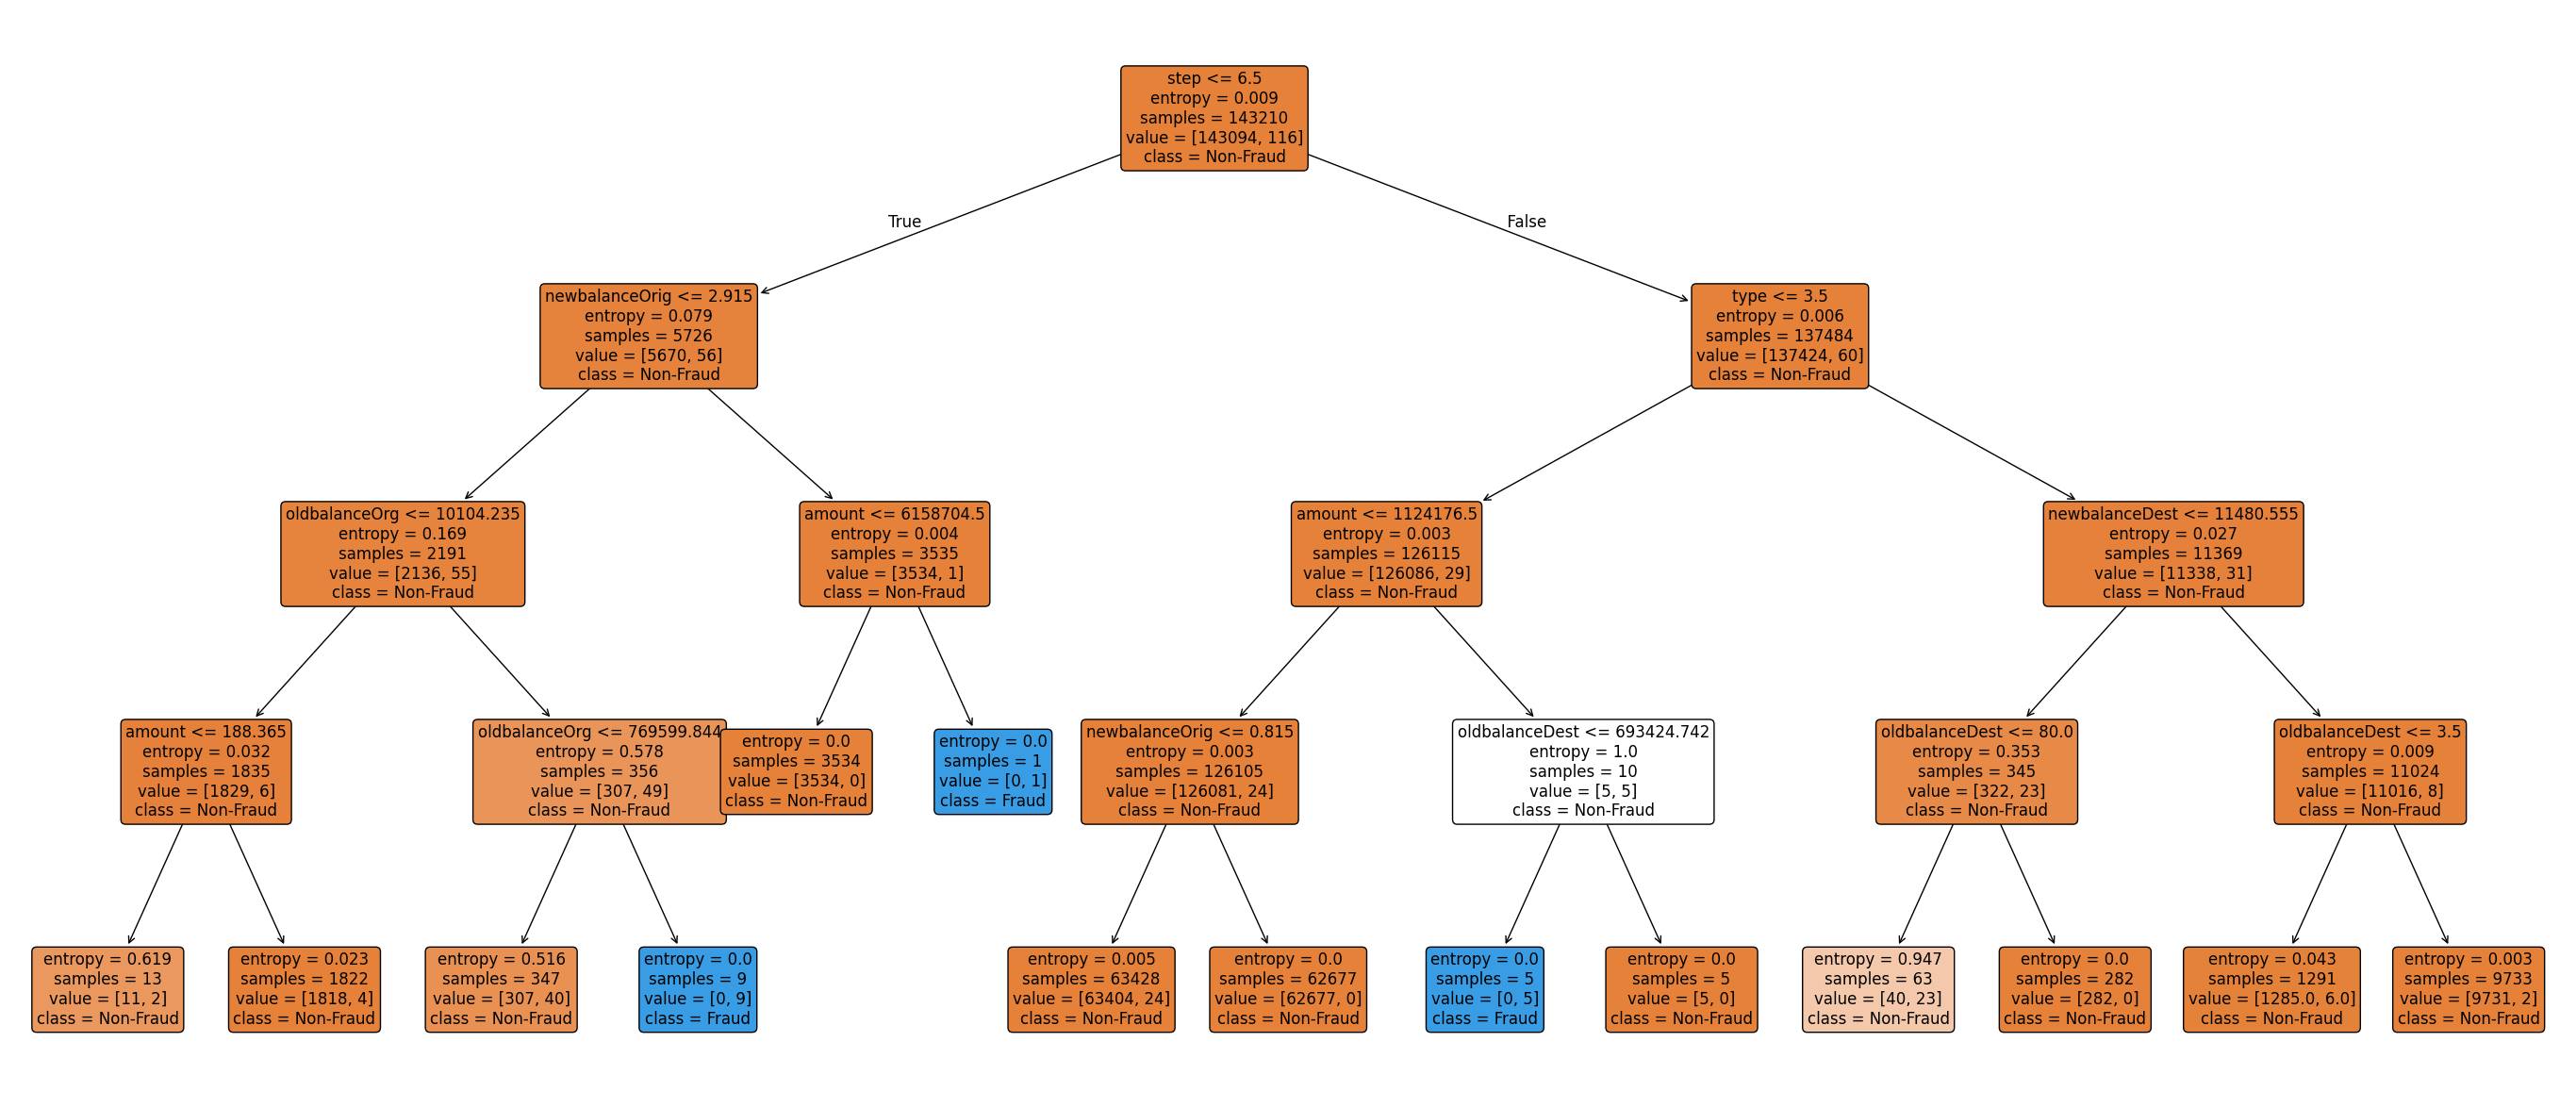

In [50]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(35,15))
plot_tree(id3_tree,
          filled=True,
          feature_names=X.columns,
          class_names=['Non-Fraud', 'Fraud'],
          rounded=True,
          fontsize=12)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


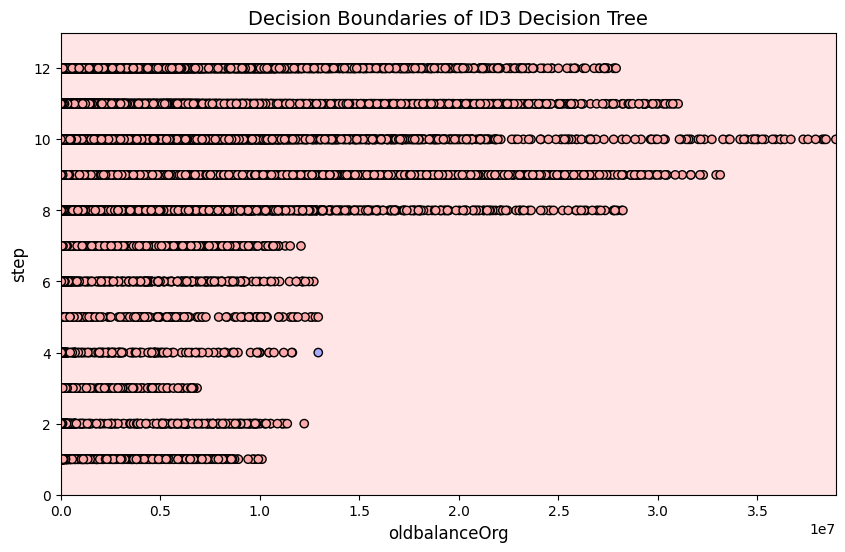

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
feature_indices = np.argsort(id3_tree.feature_importances_)[-2:]  # Get indices of top 2 features
X_selected = X_train.iloc[:, feature_indices]  # Select only those features
tree_small = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
tree_small.fit(X_selected, y_train)

x_min, x_max = X_selected.iloc[:, 0].min() - 1, X_selected.iloc[:, 0].max() + 1
y_min, y_max = X_selected.iloc[:, 1].min() - 1, X_selected.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = tree_small.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap = ListedColormap(["#FFAAAA", "#AAAAFF"])
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
plt.scatter(X_selected.iloc[:, 0], X_selected.iloc[:, 1], c=y_train, cmap=cmap, edgecolor='k')

plt.xlabel(X_selected.columns[0], fontsize=12)
plt.ylabel(X_selected.columns[1], fontsize=12)
plt.title("Decision Boundaries of ID3 Decision Tree", fontsize=14)
plt.show()


In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df['nameOrig'] = label_encoder.fit_transform(df['nameOrig'])
df['nameDest'] = label_encoder.fit_transform(df['nameDest'])

X = df.drop(columns=['isFraud', 'isFlaggedFraud'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])



[[-4.37082553  0.89100654 -0.51049842 -1.32062152 -0.25634087 -0.2625445
   1.12894948 -0.39055319 -0.4439824   0.78022362]
 [-4.37082553  0.89100654 -0.53440662 -0.54450805 -0.30924245 -0.31196073
   1.21985654 -0.39055319 -0.4439824   0.78022362]
 [-4.37082553  1.63256474 -0.53945269 -1.18924381 -0.3167282  -0.31875875
  -0.44233262 -0.39055319 -0.4439824   0.78022362]
 [-4.37082553 -0.59210986 -0.53945269  1.44492858 -0.3167282  -0.31875875
  -0.51159904 -0.38163154 -0.4439824  -0.85683035]
 [-4.37082553  0.89100654 -0.50501701  0.1355443  -0.30202781 -0.30827809
   0.06499267 -0.39055319 -0.4439824   0.78022362]]


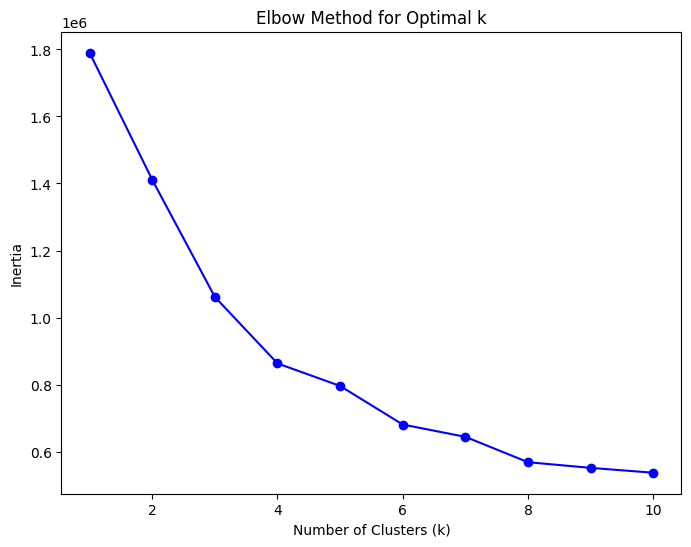

In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal k")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [55]:

kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster'] = y_kmeans

print(df.head())


   step  type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1     3   9839.64     21261       170136.0       160296.36     53488   
1     1     3   1864.28     61367        21249.0        19384.72     55706   
2     1     4    181.00     28050          181.0            0.00     15151   
3     1     1    181.00    164172          181.0            0.00     13461   
4     1     3  11668.14     96509        41554.0        29885.86     27529   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  Cluster  
0             0.0             0.0      0.0             0.0        1  
1             0.0             0.0      0.0             0.0        1  
2             0.0             0.0      1.0             0.0        1  
3         21182.0             0.0      1.0             0.0        0  
4             0.0             0.0      0.0             0.0        1  


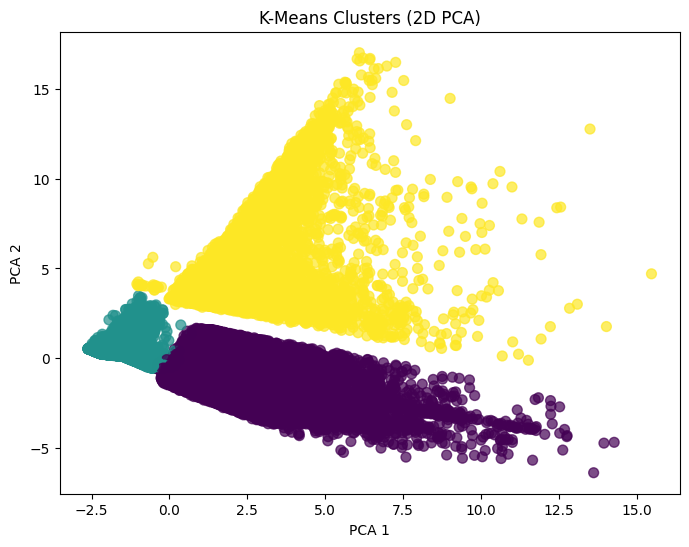

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.7)
plt.title("K-Means Clusters (2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
